In [1]:
!pip install pandas matplotlib seaborn scikit-learn transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.0 MB/s eta 0:00:0000:0100:01


Preprocessing time: 0.00 seconds
Embedding generation time: 54.13 seconds
Dimensionality reduction time: 2.67 seconds


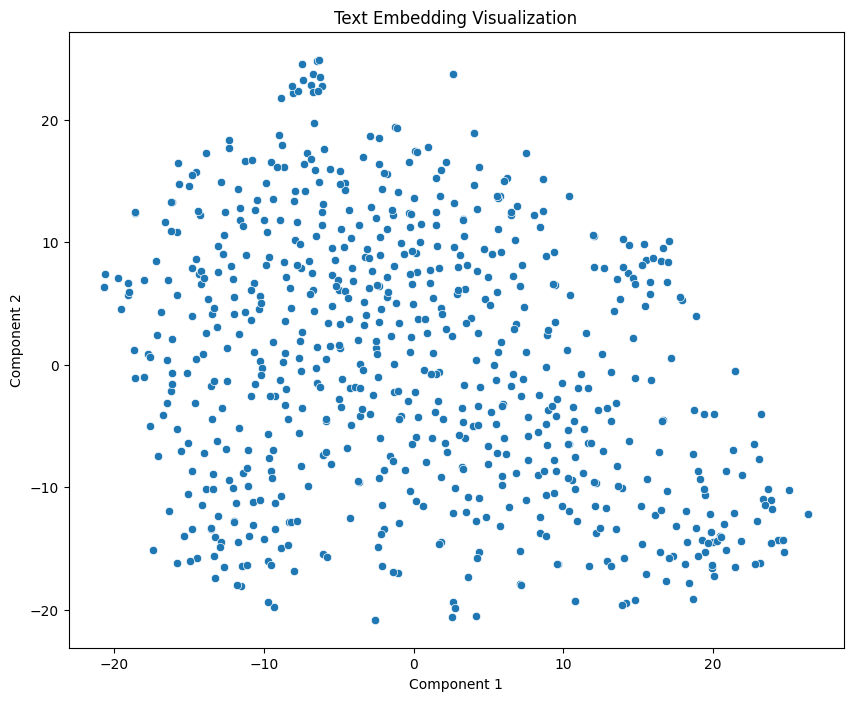

Visualization time: 0.54 seconds


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel
import torch
import time
import numpy as np

# Step 1: Load and preprocess the dataset
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    texts = df['content'].tolist()  # Update the column name based on inspection
    return texts

# Step 2: Generate text embeddings using BERT
def generate_embeddings(texts, model, tokenizer):
    embeddings = []
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)  # Convert to NumPy array

# Step 3: Apply dimensionality reduction
def reduce_dimensions(embeddings, method='tsne'):
    if method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    elif method == 'pca':
        reducer = PCA(n_components=2)
    else:
        raise ValueError("Invalid method. Choose 'tsne' or 'pca'.")
    reduced_embeddings = reducer.fit_transform(embeddings)
    return reduced_embeddings

# Step 4: Visualize the embeddings
def visualize_embeddings(reduced_embeddings, output_path):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
    plt.title('Text Embedding Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.savefig(output_path)
    plt.show()

# Main function to run the steps with time measurement
def main():
    file_path = 'tweets_anger.csv'
    output_path = 'embedding_visualization.png'
    
    # Load BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    
    start_time = time.time()
    
    # Load and preprocess the dataset
    texts = load_and_preprocess(file_path)
    print(f"Preprocessing time: {time.time() - start_time:.2f} seconds")
    
    # Generate embeddings
    start_time = time.time()
    embeddings = generate_embeddings(texts, model, tokenizer)
    print(f"Embedding generation time: {time.time() - start_time:.2f} seconds")
    
    # Reduce dimensions
    start_time = time.time()
    reduced_embeddings = reduce_dimensions(embeddings, method='tsne')
    print(f"Dimensionality reduction time: {time.time() - start_time:.2f} seconds")
    
    # Visualize embeddings
    start_time = time.time()
    visualize_embeddings(reduced_embeddings, output_path)
    print(f"Visualization time: {time.time() - start_time:.2f} seconds")

if __name__ == '__main__':
    main()


In [4]:
import pandas as pd

def inspect_dataset(file_path):
    df = pd.read_csv(file_path)
    print("Column names:", df.columns)
    print("First few rows:\n", df.head())

# Inspect the dataset
file_path = 'tweets_anger.csv'
inspect_dataset(file_path)


Column names: Index(['tweet_id', 'sentiment', 'author', 'content', 'dominant_emotion'], dtype='object')
First few rows:
      tweet_id sentiment         author  \
0  1956973690     worry  catchtheapple   
1  1956976187   neutral     ivoflipse5   
2  1956991009      hate        rdyfrde   
3  1957004749      hate     golden_one   
4  1957014706      hate  butteredninja   

                                             content dominant_emotion  
0      I HATE CANCER. I HATE IT I HATE IT I HATE IT.            anger  
1    Screw you @davidbrussee! I only have 3 weeks...            anger  
2                      @soviet_star Damn, that sucks            anger  
3  don't you hate it when you finish all your wor...            anger  
4  I hate Bakersfield and I hate the Ports, let m...            anger  


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dark_theme_network_graph.jpg'

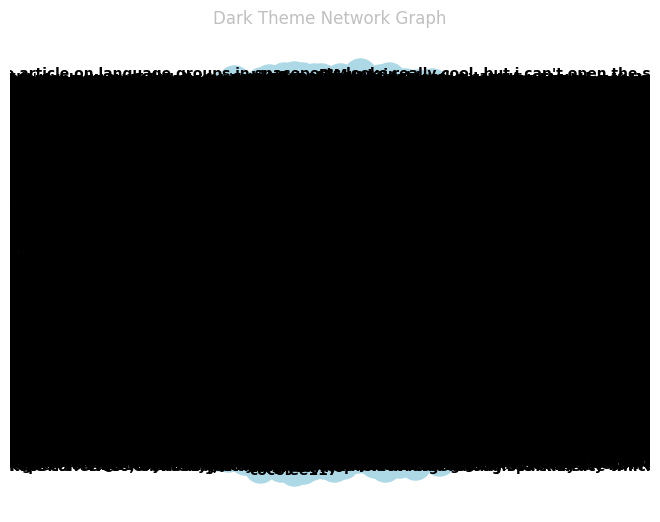

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('tweets_admiration.csv')

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, source='author', target='content')

# Apply dark theme settings to Matplotlib
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['grid.color'] = 'gray'

# Set node positions
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(
    G,
    pos,
    node_color='lightblue',  # Light blue nodes
    edge_color='gray',  # Dark gray edges
    with_labels=True,
    font_weight='bold',
    font_size=10,
    width=1,
    node_size=500,
)

# Remove axes and set background color
plt.axis('off')
plt.gca().set_facecolor('#121212')  # Darker background

# Add a title with adjusted color
plt.title('Dark Theme Network Graph', color='#c0c0c0')

# Save the graph as an image file
plt.savefig('/mnt/data/dark_theme_network_graph.jpg', format='jpg')

# Display the plot
plt.show()


In [8]:
from textblob import TextBlob

# Calculate sentiment polarity
tweets_anger['polarity'] = tweets_anger['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(tweets_anger['polarity'], bins=30, color='red', edgecolor='black')
plt.title('Sentiment Polarity Distribution of Angry Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


NameError: name 'tweets_anger' is not defined